In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('train_walmart.csv')

In [3]:
features_df = pd.read_csv("features.csv")
stores_df = pd.read_csv("stores.csv")

In [4]:
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [5]:
features_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [6]:
stores_df

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [7]:
train_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [8]:
features_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [9]:
stores_df.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [10]:
## inner join
dataset_m = features_df.merge(stores_df,how='inner',on='Store')

In [11]:
features_df.shape

(8190, 12)

In [12]:
dataset_m.shape

(8190, 14)

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [14]:
dataset_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
 12  Type          8190 non-null   object 
 13  Size          8190 non-null   int64  
dtypes: bool(1), float64(9), int64(2), object(2)
memory usage: 903.8+ KB


In [15]:
from datetime import datetime
dataset_m['Date'] = pd.to_datetime(dataset_m['Date'])
train_df['Date'] = pd.to_datetime(train_df['Date'])

In [16]:
df = train_df.merge(dataset_m, how='inner',on = ['Store','Date','IsHoliday'])

In [17]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


In [18]:
df['week'] = df.Date.dt.isocalendar().week

In [19]:
df['year'] = df.Date.dt.isocalendar().year

In [20]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,2012
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,2012
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,2012
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,2012


In [21]:
def scatter(dff,column):
    plt.figure(figsize=(12,8))
    plt.scatter(dff[column],dff['Weekly_Sales'])
    plt.ylabel('weekly sales')
    plt.xlabel(column)

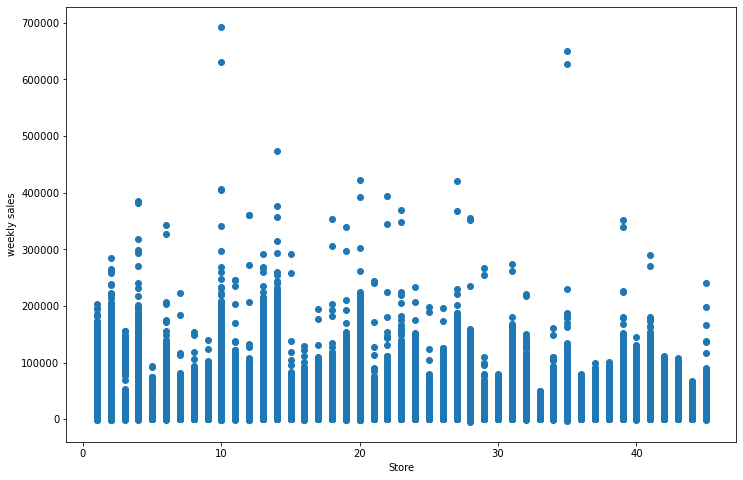

In [22]:
scatter(df,'Store')

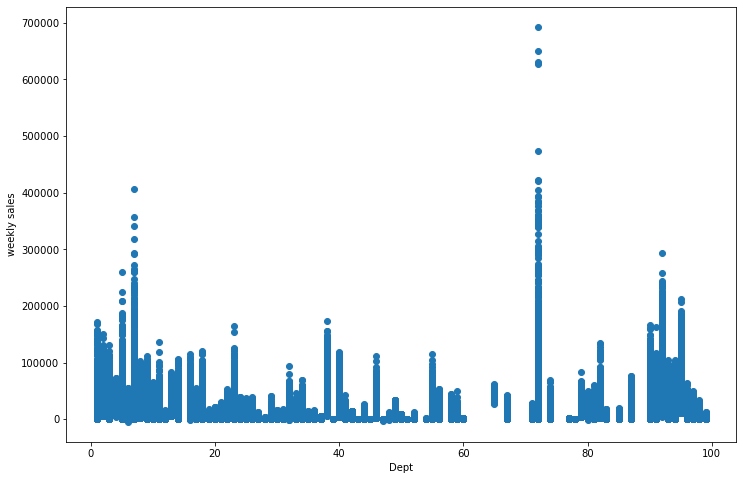

In [23]:
scatter(df,'Dept')

In [24]:
df.year.value_counts()

2011    153453
2010    140679
2012    127438
Name: year, dtype: Int64

In [25]:
weekly_sales_2011 = df[df['year']==2011].groupby(['week'])['Weekly_Sales'].mean()

In [26]:
weekly_sales_2011

week
1     14599.244973
2     13891.283484
3     13932.367385
4     13566.239462
5     15773.448776
6     16111.706191
7     16541.991212
8     15049.747558
9     15882.557045
10    15056.450540
11    15216.115961
12    14573.827050
13    14726.869261
14    15634.571312
15    15229.708141
16    16472.653827
17    14745.946064
18    15757.215296
19    15317.204186
20    15002.247279
21    15390.233449
22    16691.305332
23    16302.918830
24    16111.226407
25    15649.418342
26    16232.862334
27    16328.646803
28    15566.323502
29    15526.204180
30    14965.150490
31    16393.126313
32    15774.068626
33    15888.028317
34    16068.095036
35    15387.122167
36    15809.069483
37    14865.566897
38    14446.431089
39    14298.824402
40    15960.678959
41    15062.736015
42    15521.325691
43    15470.924781
44    16471.071192
45    16348.811046
46    15683.546288
47    22043.563476
48    16496.511854
49    18458.853056
50    19942.149333
51    25437.146122
52    15332.154858
Name: W

<AxesSubplot:xlabel='week'>

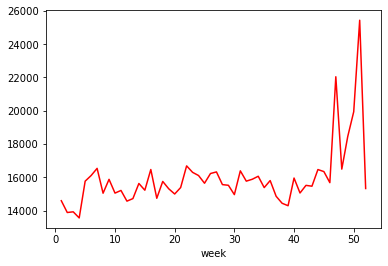

In [27]:
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values,color='red')

In [28]:
weekly_sales_2010 = df[df['year']==2010].groupby(['week'])['Weekly_Sales'].mean()

<AxesSubplot:xlabel='week'>

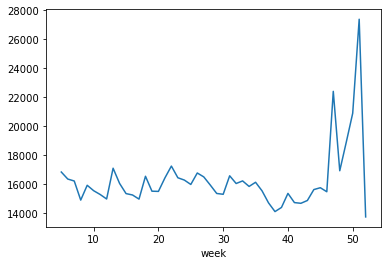

In [29]:
sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values)

In [30]:
weekly_sales_2012 = df[df['year']==2012].groupby(['week'])['Weekly_Sales'].mean()

<AxesSubplot:xlabel='week'>

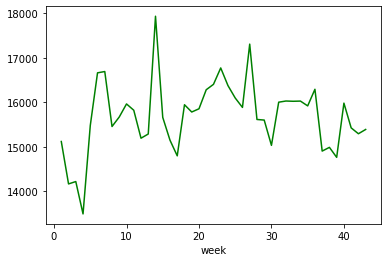

In [31]:
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values,color='green')

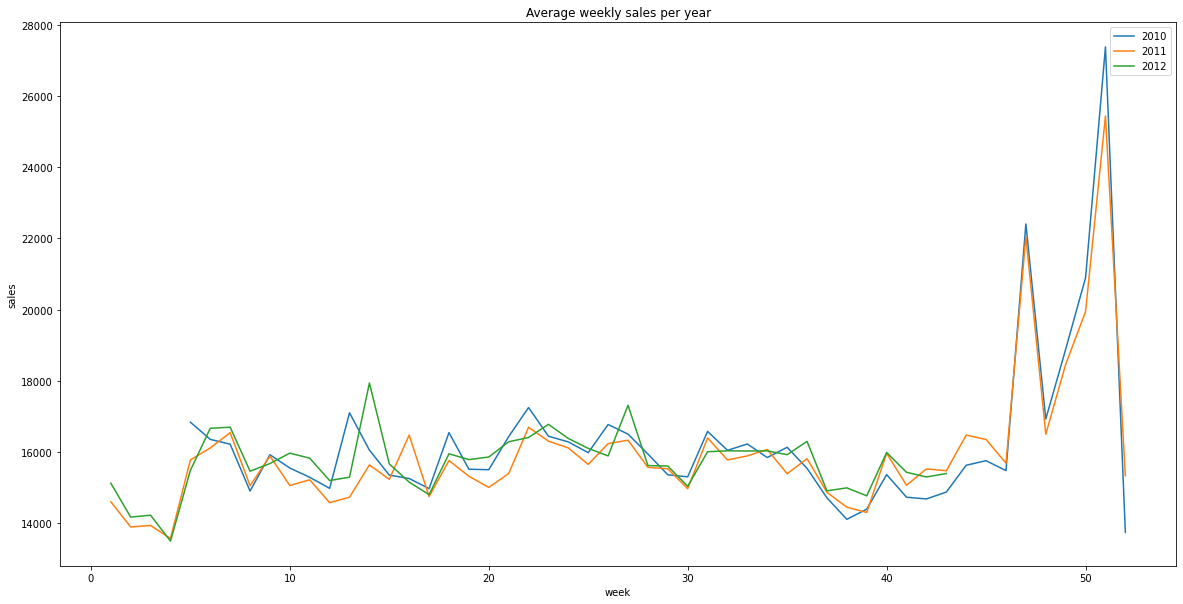

In [32]:
plt.figure(figsize=(20,10))
sns.lineplot(weekly_sales_2010.index,weekly_sales_2010.values)
sns.lineplot(weekly_sales_2011.index,weekly_sales_2011.values)
sns.lineplot(weekly_sales_2012.index,weekly_sales_2012.values)
plt.title('Average weekly sales per year')
plt.ylabel('sales')

plt.legend(['2010','2011','2012'])

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

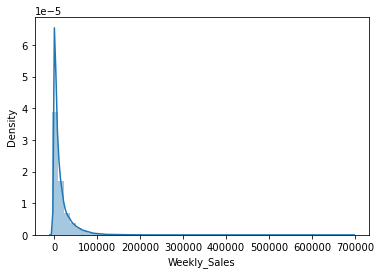

In [33]:
sns.distplot(df['Weekly_Sales'])

<AxesSubplot:xlabel='Type', ylabel='Size'>

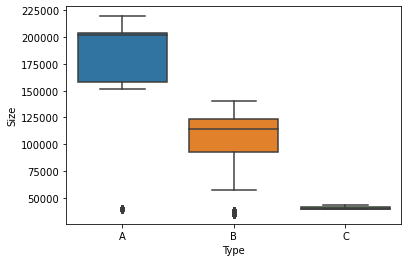

In [34]:
sns.boxplot(x = 'Type',y='Size',data=df)

In [35]:
weekly_sales_store = df.groupby(['Store'])['Weekly_Sales'].mean()

In [36]:
weekly_sales_store.sort_values(ascending=False)

Store
20    29508.301592
4     29161.210415
14    28784.851727
13    27355.136891
2     26898.070031
10    26332.303819
27    24826.984536
6     21913.243624
1     21710.543621
39    21000.763562
19    20362.126734
23    19776.180881
31    19681.907464
11    19276.762751
24    18969.106500
28    18714.889803
41    17976.004648
32    16351.621855
18    15733.313136
22    15181.218886
12    14867.308619
26    14554.129672
35    13803.596986
40    13763.632803
34    13522.081671
43    13415.114118
8     13133.014768
17    12954.393636
45    11662.897315
42    11443.370118
21    11283.435496
25    10308.157810
37    10297.355026
15     9002.493073
9      8772.890379
30     8764.237719
36     8584.412563
7      8358.766148
29     8158.810609
16     7863.224124
38     7492.478460
3      6373.033983
44     6038.929814
33     5728.414053
5      5053.415813
Name: Weekly_Sales, dtype: float64

In [37]:
pd.DataFrame(weekly_sales_store).sort_values(by ='Weekly_Sales',ascending=False).style.bar()

,Weekly_Sales
Store,
20,29508.301592
4,29161.210415
14,28784.851727
13,27355.136891
2,26898.070031
10,26332.303819
27,24826.984536
6,21913.243624
1,21710.543621


In [38]:
len(df.Store.unique())

45

In [39]:
df.corr()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,week,year
Store,1.000000,0.024004,-0.085195,-0.000548,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552,-0.182881,0.001031,0.002997
Dept,0.024004,1.000000,0.148032,0.000916,0.004437,0.003572,-0.002426,0.000290,0.001784,0.004257,0.000109,-0.007477,0.007837,-0.002966,0.000882,0.003738
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864,0.243828,0.027673,-0.010111
IsHoliday,-0.000548,0.000916,0.012774,1.000000,-0.155949,-0.078281,-0.035586,0.334818,0.427960,-0.000562,-0.053719,-0.001944,0.010460,0.000593,0.128184,-0.056746
Temperature,-0.050097,0.004437,-0.002312,-0.155949,1.000000,0.143859,-0.040594,-0.323927,-0.096880,-0.063947,-0.017544,0.182112,0.096730,-0.058313,0.236276,0.065814
Fuel_Price,0.065290,0.003572,-0.000120,-0.078281,0.143859,1.000000,0.061371,-0.220895,-0.102092,-0.044986,-0.128065,-0.164210,-0.033853,0.003361,-0.031140,0.779633
MarkDown1,-0.119588,-0.002426,0.085251,-0.035586,-0.040594,0.061371,1.000000,0.024486,-0.108115,0.819238,0.160257,-0.055558,0.050285,0.345673,-0.198076,0.141332
MarkDown2,-0.035173,0.000290,0.024130,0.334818,-0.323927,-0.220895,0.024486,1.000000,-0.050108,-0.007768,-0.007440,-0.039534,0.020940,0.108827,-0.000995,-0.222109
MarkDown3,-0.031556,0.001784,0.060385,0.427960,-0.096880,-0.102092,-0.108115,-0.050108,1.000000,-0.071095,-0.026467,-0.023590,0.012818,0.048913,0.196307,-0.319162
MarkDown4,-0.009941,0.004257,0.045414,-0.000562,-0.063947,-0.044986,0.819238,-0.007768,-0.071095,1.000000,0.107792,-0.049628,0.024963,0.168196,-0.218477,0.126469


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]),
 [Text(0, 0.5, 'Store'),
  Text(0, 1.5, 'Dept'),
  Text(0, 2.5, 'Weekly_Sales'),
  Text(0, 3.5, 'IsHoliday'),
  Text(0, 4.5, 'Temperature'),
  Text(0, 5.5, 'Fuel_Price'),
  Text(0, 6.5, 'MarkDown1'),
  Text(0, 7.5, 'MarkDown2'),
  Text(0, 8.5, 'MarkDown3'),
  Text(0, 9.5, 'MarkDown4'),
  Text(0, 10.5, 'MarkDown5'),
  Text(0, 11.5, 'CPI'),
  Text(0, 12.5, 'Unemployment'),
  Text(0, 13.5, 'Size'),
  Text(0, 14.5, 'week'),
  Text(0, 15.5, 'year')])

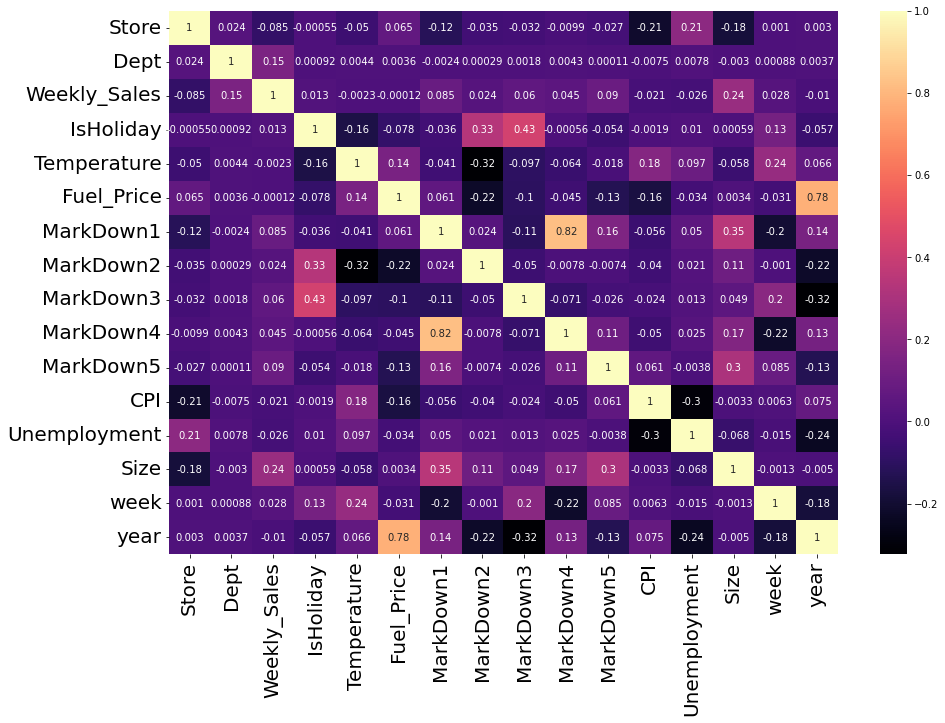

In [40]:
corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True,cmap='magma',center=None)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


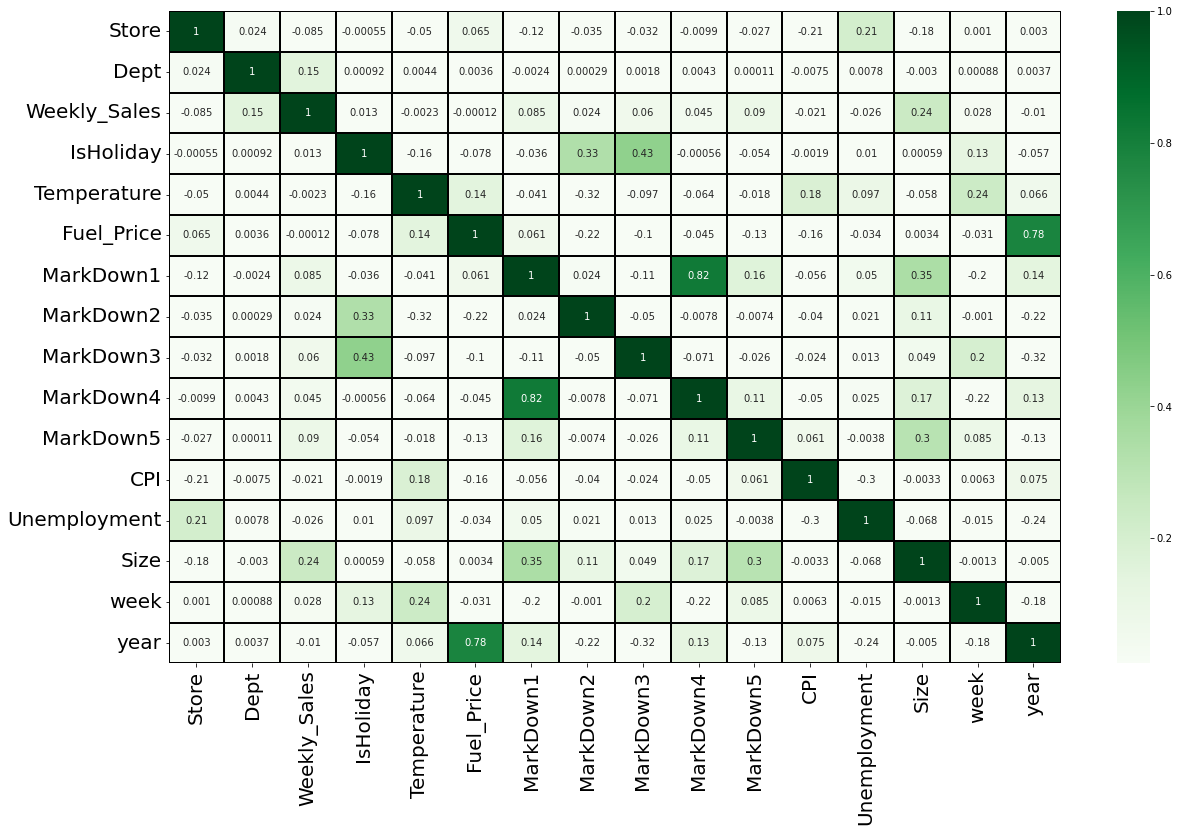

In [41]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),vmin=0.01,linecolor="black",linewidth=2, cmap="Greens",center=None, annot=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()
